In [56]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import wls
import matplotlib.pyplot as plt

In [57]:
#read csv
Prog_perfrm = pd.read_csv('../data/QueryResultTable.csv')
#only select a subset of the available variables
Prog_perfrm = Prog_perfrm[['SchoolID','School','SchoolType','No_of_Program','Subject', 'FrRedLnch_PercentEligible', 'Enrollment','PercentageMeetsORExceeds2014to2015']]
# remove records with missing data
Prog_perfrm = Prog_perfrm.dropna()
#Considering Elementary Schools only
Prog_perfrm = Prog_perfrm[Prog_perfrm['SchoolType'] == 'E']
Prog_perfrm

,SchoolID,School,SchoolType,No_of_Program,Subject,FrRedLnch_PercentEligible,Enrollment,PercentageMeetsORExceeds2014to2015
0,813,A C Houghton Elementary School,E,1,English Language Arts,76.17,298.0,39.7
1,813,A C Houghton Elementary School,E,1,Mathematics,76.17,298.0,35.4
2,822,Abernethy Elementary School,E,1,English Language Arts,11.33,512.0,86.3
3,822,Abernethy Elementary School,E,1,Mathematics,11.33,512.0,79.7
4,822,Abernethy Elementary School,E,1,Science,11.33,512.0,95.0
5,1350,Abraham Lincoln Elementary,E,2,English Language Arts,41.73,496.0,66.5
6,1350,Abraham Lincoln Elementary,E,2,Mathematics,41.73,496.0,55.4
7,1350,Abraham Lincoln Elementary,E,2,Science,41.73,496.0,91.8
17,27,Adams Elementary School,E,4,English Language Arts,21.43,378.0,66.5
18,27,Adams Elementary School,E,4,Mathematics,21.43,378.0,66.5


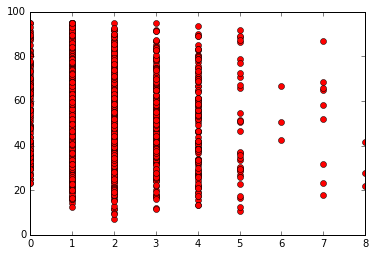

In [58]:
#Plot: Number of Programs (No_of_Program - x-axis) by PercentageMeetsORExceeds2014to2015 (y-axis)
plt.plot(Prog_perfrm['No_of_Program'], Prog_perfrm ['PercentageMeetsORExceeds2014to2015'], 'ro')
plt.show()

In [59]:
#Weighted Regression: Performance with Number of Programs
results = wls("PercentageMeetsORExceeds2014to2015 ~ No_of_Program + FrRedLnch_PercentEligible",data=Prog_perfrm, weights = Prog_perfrm['Enrollment']).fit()
print(results.summary())

                                    WLS Regression Results                                    
Dep. Variable:     PercentageMeetsORExceeds2014to2015   R-squared:                       0.525
Model:                                            WLS   Adj. R-squared:                  0.524
Method:                                 Least Squares   F-statistic:                     1041.
Date:                                Sun, 22 May 2016   Prob (F-statistic):          2.92e-305
Time:                                        20:50:03   Log-Likelihood:                -7668.5
No. Observations:                                1888   AIC:                         1.534e+04
Df Residuals:                                    1885   BIC:                         1.536e+04
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                                coef    std err   

In [64]:
#sm.graphics.plot_partregress("PercentageMeetsORExceeds2014to2015", "No_of_Program", exog_others=["FrRedLnch_PercentEligible"], data=Prog_perfrm, title_kwargs={}, obs_labels=False)

In [61]:
#Considering only Science Performance
Sc_perfrm= Prog_perfrm.query("Subject == 'Science'")
Sc_perfrm
#Weighted Regression: Performance with Number of Programs
results = wls("PercentageMeetsORExceeds2014to2015 ~ No_of_Program + FrRedLnch_PercentEligible",data=Sc_perfrm, weights = Sc_perfrm['Enrollment']).fit()
print(results.summary())

                                    WLS Regression Results                                    
Dep. Variable:     PercentageMeetsORExceeds2014to2015   R-squared:                       0.547
Model:                                            WLS   Adj. R-squared:                  0.546
Method:                                 Least Squares   F-statistic:                     366.9
Date:                                Sun, 22 May 2016   Prob (F-statistic):          3.55e-105
Time:                                        20:50:16   Log-Likelihood:                -2428.9
No. Observations:                                 610   AIC:                             4864.
Df Residuals:                                     607   BIC:                             4877.
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                                coef    std err   

In [62]:
#Considering only English Performance
Eng_perfrm= Prog_perfrm.query("Subject == 'English Language Arts'")
Eng_perfrm
#Weighted Regression: Performance with Number of Programs
results = wls("PercentageMeetsORExceeds2014to2015 ~ No_of_Program + FrRedLnch_PercentEligible",data=Eng_perfrm, weights = Eng_perfrm['Enrollment']).fit()
print(results.summary())

                                    WLS Regression Results                                    
Dep. Variable:     PercentageMeetsORExceeds2014to2015   R-squared:                       0.751
Model:                                            WLS   Adj. R-squared:                  0.750
Method:                                 Least Squares   F-statistic:                     960.1
Date:                                Sun, 22 May 2016   Prob (F-statistic):          7.64e-193
Time:                                        20:50:20   Log-Likelihood:                -2278.3
No. Observations:                                 639   AIC:                             4563.
Df Residuals:                                     636   BIC:                             4576.
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                                coef    std err   

In [63]:
#Considering only Math Performance
Math_perfrm= Prog_perfrm.query("Subject == 'Mathematics'")
Math_perfrm
#Weighted Regression: Performance with Number of Programs
results = wls("PercentageMeetsORExceeds2014to2015 ~ No_of_Program + FrRedLnch_PercentEligible",data=Math_perfrm, weights = Math_perfrm['Enrollment']).fit()
print(results.summary())

                                    WLS Regression Results                                    
Dep. Variable:     PercentageMeetsORExceeds2014to2015   R-squared:                       0.737
Model:                                            WLS   Adj. R-squared:                  0.736
Method:                                 Least Squares   F-statistic:                     891.5
Date:                                Sun, 22 May 2016   Prob (F-statistic):          3.17e-185
Time:                                        20:50:24   Log-Likelihood:                -2313.5
No. Observations:                                 639   AIC:                             4633.
Df Residuals:                                     636   BIC:                             4646.
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                                coef    std err   